**PROBLEM STAEMENT**

2) Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [103]:
df=pd.read_csv("StudentsPerformance.csv",delimiter=',')

In [104]:
df

,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
0,80.0,90.0,70.0,77,2018,2
1,70.0,77.0,76.0,85,2018,3
2,62.0,88.0,68.0,92,2019,3
3,94.0,84.0,71.0,78,2019,2
4,78.0,81.0,62.0,100,2020,3
5,77.0,200.0,73.0,82,2020,2
6,77.0,75.0,65.0,100,2020,3
7,62.0,80.0,63.0,97,2019,3
8,79.0,88.0,65.0,82,2018,2
9,63.0,94.0,73.0,79,2021,1


In [105]:
df.describe()

,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
count,29.000000,29.000000,29.000000,30.000000,30.000000,30.000000
mean,75.103448,88.068966,69.620690,85.633333,2019.466667,2.433333
std,21.699810,22.238851,5.734693,8.833648,0.899553,0.568321
min,61.000000,75.000000,61.000000,75.000000,2018.000000,1.000000
25%,65.000000,80.000000,64.000000,77.250000,2019.000000,2.000000
50%,70.000000,83.000000,70.000000,82.000000,2020.000000,2.000000
75%,78.000000,90.000000,74.000000,93.000000,2020.000000,3.000000
max,180.000000,200.000000,79.000000,100.000000,2021.000000,3.000000


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Math_score             29 non-null     float64
 1   Reading_score          29 non-null     float64
 2   Writing_score          29 non-null     float64
 3   Placement_score        30 non-null     int64  
 4   Club_Join_Date         30 non-null     int64  
 5   Placement_Offer_Count  30 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 1.5 KB


In [107]:
df.dtypes

Math_score               float64
Reading_score            float64
Writing_score            float64
Placement_score            int64
Club_Join_Date             int64
Placement_Offer_Count      int64
dtype: object

In [108]:
df.isnull()

,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [109]:
df.isnull().sum()

Math_score               1
Reading_score            1
Writing_score            1
Placement_score          0
Club_Join_Date           0
Placement_Offer_Count    0
dtype: int64

In [110]:
df.notnull()

,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True


In [111]:
df.notnull().sum()

Math_score               29
Reading_score            29
Writing_score            29
Placement_score          30
Club_Join_Date           30
Placement_Offer_Count    30
dtype: int64

In [112]:
df1=df.copy()

In [113]:
df1.fillna(0,inplace=True)

In [114]:
df1

,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
0,80.0,90.0,70.0,77,2018,2
1,70.0,77.0,76.0,85,2018,3
2,62.0,88.0,68.0,92,2019,3
3,94.0,84.0,71.0,78,2019,2
4,78.0,81.0,62.0,100,2020,3
5,77.0,200.0,73.0,82,2020,2
6,77.0,75.0,65.0,100,2020,3
7,62.0,80.0,63.0,97,2019,3
8,79.0,88.0,65.0,82,2018,2
9,63.0,94.0,73.0,79,2021,1


In [115]:
df['Math_score']=df['Math_score'].fillna(df['Math_score'].mean())

In [116]:
df


,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
0,80.000000,90.0,70.0,77,2018,2
1,70.000000,77.0,76.0,85,2018,3
2,62.000000,88.0,68.0,92,2019,3
3,94.000000,84.0,71.0,78,2019,2
4,78.000000,81.0,62.0,100,2020,3
5,77.000000,200.0,73.0,82,2020,2
6,77.000000,75.0,65.0,100,2020,3
7,62.000000,80.0,63.0,97,2019,3
8,79.000000,88.0,65.0,82,2018,2
9,63.000000,94.0,73.0,79,2021,1


In [117]:
df['Reading_score']=df['Reading_score'].fillna(df['Reading_score'].mean())

In [118]:
df['Writing_score']=df['Writing_score'].fillna(df['Writing_score'].mean())

In [119]:
df

,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
0,80.000000,90.000000,70.00000,77,2018,2
1,70.000000,77.000000,76.00000,85,2018,3
2,62.000000,88.000000,68.00000,92,2019,3
3,94.000000,84.000000,71.00000,78,2019,2
4,78.000000,81.000000,62.00000,100,2020,3
5,77.000000,200.000000,73.00000,82,2020,2
6,77.000000,75.000000,65.00000,100,2020,3
7,62.000000,80.000000,63.00000,97,2019,3
8,79.000000,88.000000,65.00000,82,2018,2
9,63.000000,94.000000,73.00000,79,2021,1


In [120]:
df.isnull().sum()

Math_score               0
Reading_score            0
Writing_score            0
Placement_score          0
Club_Join_Date           0
Placement_Offer_Count    0
dtype: int64

In [121]:
col=['Math_score','Reading_score','Writing_score','Placement_score']

<AxesSubplot:>

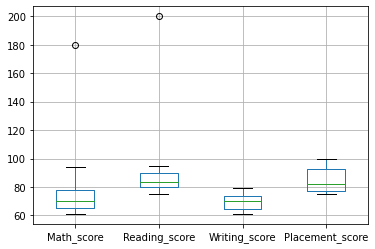

In [122]:
df.boxplot(col)

In [123]:
z=stats.zscore(df['Math_score'])

In [124]:
z

0     2.335694e-01
1    -2.434386e-01
2    -6.250450e-01
3     9.013807e-01
4     1.381678e-01
5     9.046704e-02
6     9.046704e-02
7    -6.250450e-01
8     1.858686e-01
9    -5.773442e-01
10   -4.342418e-01
11   -2.911394e-01
12    2.335694e-01
13   -4.342418e-01
14   -5.296434e-01
15    1.381678e-01
16   -6.727458e-01
17    5.003650e+00
18    2.335694e-01
19   -2.434386e-01
20   -2.911394e-01
21   -1.957378e-01
22   -1.957378e-01
23   -6.727458e-01
24   -6.778692e-16
25    4.276624e-02
26   -3.388402e-01
27   -6.727458e-01
28    2.335694e-01
29   -4.819426e-01
Name: Math_score, dtype: float64

In [125]:
threshold=3
outlier=np.where(z>threshold)


In [126]:
outlier

(array([17], dtype=int64),)

In [127]:
Q1=df.Math_score.quantile(0.25)

In [128]:
Q1

65.25

In [129]:
Q3=df.Math_score.quantile(0.75)

In [130]:
Q3

78.0

In [131]:
IQR=Q3-Q1

In [132]:
IQR

12.75

In [133]:
lower_limit=Q1-1.5*IQR

In [134]:
lower_limit

46.125

In [135]:
upper_limit=Q3+1.5*IQR

In [136]:
upper_limit

97.125

In [137]:
outlier=df['Math_score'][(df['Math_score']>upper_limit)|(df['Math_score']<lower_limit)]

In [138]:
outlier

17    180.0
Name: Math_score, dtype: float64

In [139]:
mean1=df['Math_score'].mean()

In [140]:
df['Math_score']=np.where((df['Math_score']>upper_limit),mean1,df['Math_score'])

In [141]:
mean2=df['Reading_score'].mean()

In [142]:
df['Reading_score']=np.where((df['Reading_score']>upper_limit),mean1,df['Reading_score'])

In [143]:
mean3=df['Writing_score'].mean()

In [144]:
df['Writing_score']=np.where((df['Writing_score']>upper_limit),mean1,df['Writing_score'])

In [145]:
df

,Math_score,Reading_score,Writing_score,Placement_score,Club_Join_Date,Placement_Offer_Count
0,80.000000,90.000000,70.00000,77,2018,2
1,70.000000,77.000000,76.00000,85,2018,3
2,62.000000,88.000000,68.00000,92,2019,3
3,94.000000,84.000000,71.00000,78,2019,2
4,78.000000,81.000000,62.00000,100,2020,3
5,77.000000,75.103448,73.00000,82,2020,2
6,77.000000,75.000000,65.00000,100,2020,3
7,62.000000,80.000000,63.00000,97,2019,3
8,79.000000,88.000000,65.00000,82,2018,2
9,63.000000,94.000000,73.00000,79,2021,1


<AxesSubplot:>

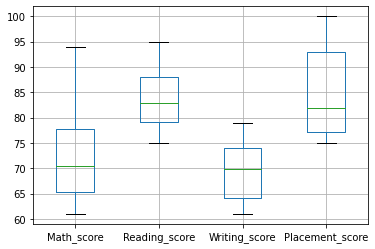

In [146]:
df.boxplot(col)

In [147]:
print("skewness:",df['Math_score'].skew())
print("kurtosis:",df['Math_score'].kurtosis())

skewness: 0.5853108132716046
kurtosis: 0.4328555433994219


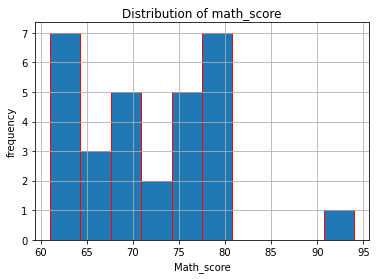

In [148]:
plt.hist(df["Math_score"],bins=10,edgecolor='red')
plt.title("Distribution of math_score")
plt.xlabel('Math_score')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

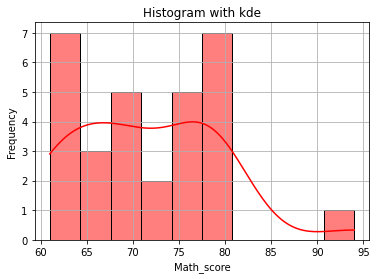

In [151]:
sns.histplot(df["Math_score"].dropna(),kde=True,stat='count',color='red',bins=10)
plt.title("Histogram with kde")
plt.xlabel("Math_score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [152]:
df["Math_score_log"]=np.log1p(df["Math_score"])
df["Math_score_log"]

0     4.394449
1     4.262680
2     4.143135
3     4.553877
4     4.369448
5     4.356709
6     4.356709
7     4.143135
8     4.382027
9     4.158883
10    4.204693
11    4.248495
12    4.394449
13    4.204693
14    4.174387
15    4.369448
16    4.127134
17    4.332094
18    4.394449
19    4.262680
20    4.248495
21    4.276666
22    4.276666
23    4.127134
24    4.332094
25    4.343805
26    4.234107
27    4.127134
28    4.394449
29    4.189655
Name: Math_score_log, dtype: float64

skewness: 0.12747193098421328


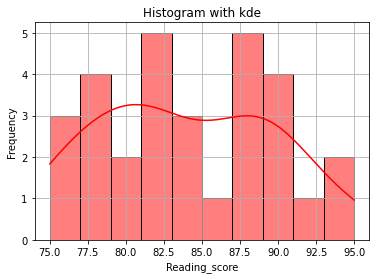

In [153]:
print("skewness:",df['Reading_score'].skew())
sns.histplot(df["Reading_score"].dropna(),kde=True,stat='count',color='red',bins=10)
plt.title("Histogram with kde")
plt.xlabel("Reading_score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

skewness: -0.022213783558180468


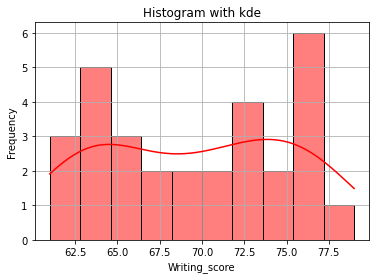

In [155]:
print("skewness:",df['Writing_score'].skew())
sns.histplot(df["Writing_score"].dropna(),kde=True,stat='count',color='red',bins=10)
plt.title("Histogram with kde")
plt.xlabel("Writing_score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
print("skewness:",df['Placement_score'].skew())
sns.histplot(df["Writing_score"].dropna(),kde=True,stat='count',color='red',bins=10)
plt.title("Histogram with kde")
plt.xlabel("Writing_score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()